In [66]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [67]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_model_names

lcset_name = 'test'
rootdir = '../save'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '0'

model_names = get_model_names(rootdir, cfilename, kf, lcset_name)
#model_names = [mn for mn in model_names if 'SelfAttn' in mn]
#model_names = [mn for mn in model_names if 'b=129' in mn]
model_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=12*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=24*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
mdl=ParallelTimeModAttn~input_dims=1~m=16~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129 ['id=1000c0', 'id=1000c1', 'id=1000c2', 'id=1001c0', 'id=1001c1', 'id=1001c2', 'id=1002c0', 'id=1002c1', 'id=1002c2', 'id=1003c0', 'id=1003c1', 'id=1003c2', 'id=1004c0', 'id=1004c1', 'id=1004c2'](15#)
k=1; c=SNII-b-n; txt=ZTF19aapafqd [SLSN]
k=39; c=SNII-b-n; txt=ZTF20aaurfwa [SLSN]
k=53; c=SNII-b-n; txt=ZTF19aajwkbb [SLSN]
k=66; c=SNII-b-n; txt=ZTF19acanzwg [SLSN]
k=215; c=SNIa; txt=ZTF20aabqdbo [SNIbc]
k=216; c=SNIa; txt=ZTF19aanhgqg [SNIbc]
k=222; c=SNIa; txt=ZTF19aapeime [SNIbc]
k=253; c=SNIa; txt=ZTF20abffaxl [SLSN]
k=11; c=SNIbc; txt=ZTF19ackjszs [SLSN]
k=15; c=SNIbc; txt=ZTF19acftclq [SNII-b-n]


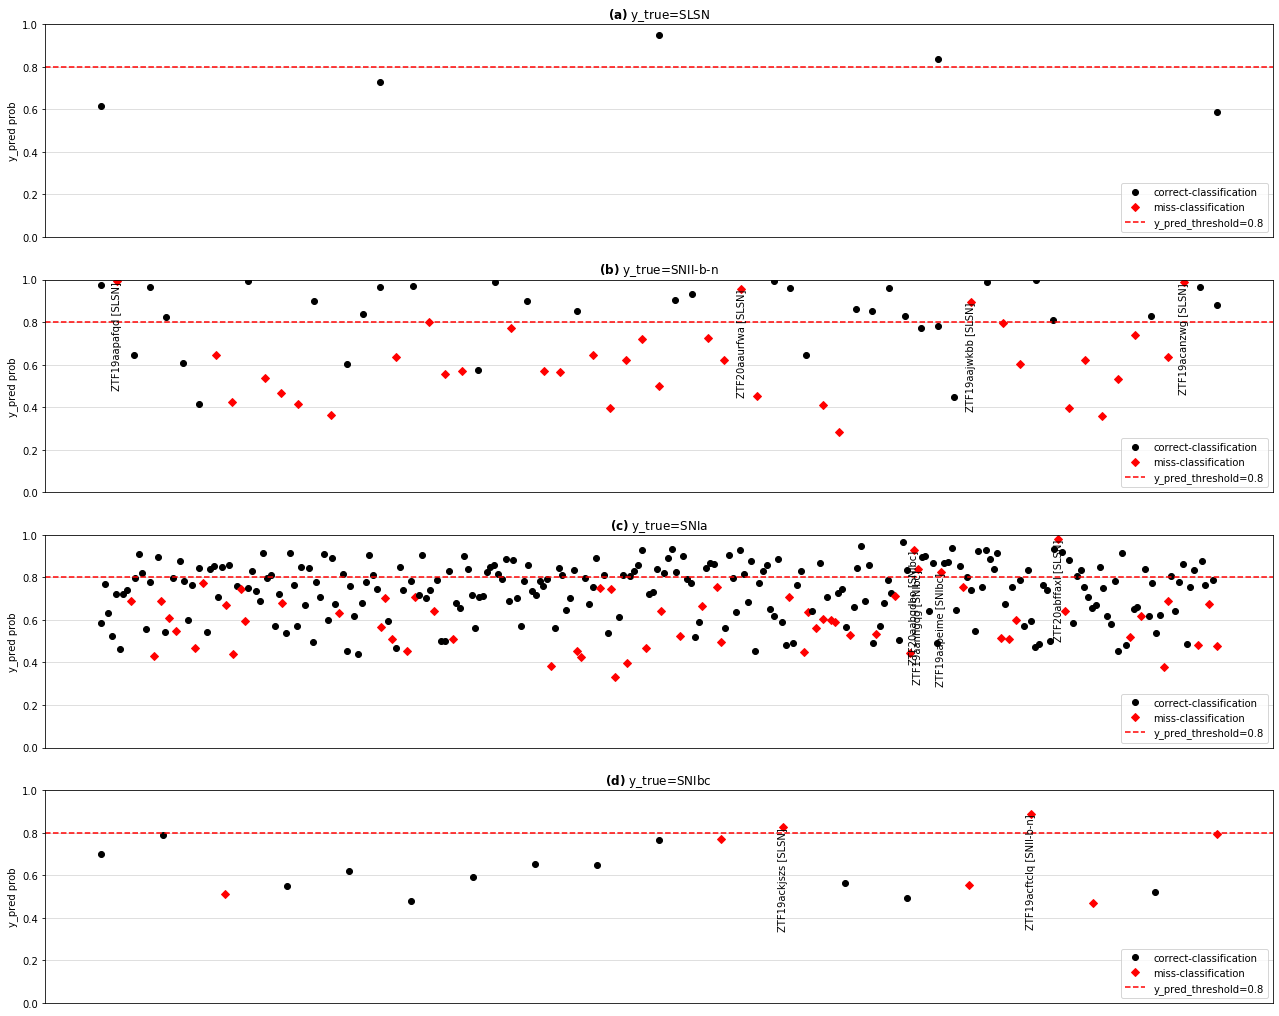

In [80]:
%load_ext autoreload
%autoreload 2
import numpy as np
import fuzzytools.files as ftfiles
from fuzzytools.datascience import missclassifications
import matplotlib.pyplot as plt

model_name = 'mdl=ParallelTimeModAttn~input_dims=1~m=16~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129'

rootdir = '../save'
train_mode = 'fine-tuning'
load_roodir = f'{rootdir}/{model_name}/{train_mode}/performance/{cfilename}'
files, files_ids = ftfiles.gather_files_by_kfold(load_roodir, kf, lcset_name,
    fext='d',
    disbalanced_kf_mode='ignore', # error oversampling
    )
print(f'{model_name} {files_ids}({len(files_ids)}#)')
file = files[0]
days = file()['days']
days_predictions = file()['days_predictions'][days[-1]]
y_pred_p = days_predictions['y_pred_p']
y_true = days_predictions['y_true']
class_names = file()['class_names']
obj_ids = file()['lcobj_names']

missclassifications.plot_missclassification_map(y_pred_p, y_true, class_names,
    obj_ids=obj_ids,
    pred_prob_th=.8, # None .5
    fontsize=10,
    figsize=(22,18),
    legend_loc='lower right',
    verbose=1,
    )
plt.show()